# DS 2500 HW 4

## Part 1: Covariance Matching (18 auto points)


<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$

In [1]:
part1_dict = {'A': 0, 'B': 7, 'C': 5, 'D': 8, 'E': 5, 'F': 6, 'G': 1, 'H': 4, 'I': 2}

part1_dict

{'A': 0, 'B': 7, 'C': 5, 'D': 8, 'E': 5, 'F': 6, 'G': 1, 'H': 4, 'I': 2}

# Part 2: Scale in Covariance & Correlation (15 points + 1)

In [2]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [3]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  

For example, if feature `MA` is 1 on 3/16/2021 then there was 1 reported new COVID case on 3/16/2021.

One might (incorrectly) reason:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct this interpretation:

In [4]:
df_covid.corr()

,MA,CA,NEU
MA,1.000000,0.813516,0.603717
CA,0.813516,1.000000,0.523122
NEU,0.603717,0.523122,1.000000


before trying to analyze the covariances, it's helpful to divide each covariance value by its respective standard deviation to find the **correlation coefficient**. this value - between -1 and 1 - removes the effects of the scale and generalizes the relationship between the two variables. in this case, cov(MA, CA) > cov(CA, NEU) because its correlation coefficient (0.81) indicates a **stronger** relationship than the other (0.52). the difference in NU's relationship to the other states may be due to the sample size and the population represented by each category.

# Part 3: Beans!

In this problem we'll use the k-Nearest Neighbor classifier to classify the species of plant that a bean comes from [a very large collection of bean image data](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).
- use the csv loaded below
- each subpart requires the completion of all previous sub-parts
- **you are intended to make scale normalization / cross validation errors in earlier parts**
    - these will be addressed in later parts

In [5]:
import pandas as pd

df_bean = pd.read_csv('dry_bean.csv')

df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Part 3.1: a not-quite-right K-NN classifier  (12 points)
Build a 21-Nearest Neighbor classifier which is `fit` and `predict`s on the whole, raw dataset.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k = 21

# prepare x input
x_feat_list = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength",
               "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", 
               "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1",
               "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]
x = df_bean.loc[:, x_feat_list].values

# prepare y input
y_feat = "Class"
y_true = df_bean.loc[:, y_feat].values

# initialize knn_classifier and fit
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(x, y_true)

# estimate each penguin's species
y_pred = knn_classifier.predict(x)

## Part 3.2: Confusion Matrix (12 points)
Plot the confusion matrix which results part 3.1.

Using the confusion matrix, identify the bean with lowest accuracy (% of these beans classified correctly)
- explicitly compute accuracy for this particular bean
    - you may manually copy and paste values from the confusion matrix into a new cell
        - e.g. `387 / (387 + 3 + 10)` or similar
- telling which other bean it is most commonly mistaken for

Your response should be one or two sentences.

<Figure size 700x700 with 0 Axes>

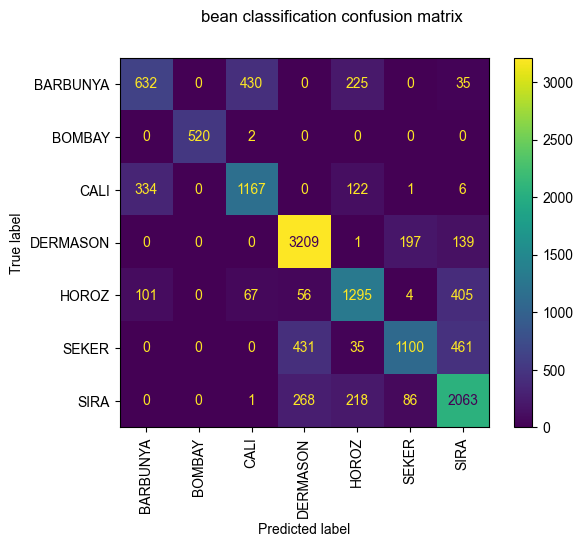

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_true = y_true, y_pred = y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))

plt.gcf().set_size_inches(7, 7)
conf_mat_disp.plot()
plt.xticks(rotation = 90)
plt.suptitle("bean classification confusion matrix")
sns.set(font_scale = .5)
plt.grid(False)

In [8]:
def accuracy(tp, tn, fp, fn):
    """ computes accuracy for a given sample
    
    args:
        tp (int): value true positive
        tn (int): value true negative
        fp (int): value false positive
        fn (int): value false negative
        
    returns:
        acc (float): accuracy value
    """
    return (tp + tn) / (tn + fp + fn + tp)

acc_dict = {"barbunya": accuracy(632, 11818, 435, 690),
           "bombay": accuracy(520, 13053, 0, 2),
           "cali": accuracy(1167, 11445, 500, 463),
           "dermason": accuracy(3209, 9277, 752, 337),
           "horoz": accuracy(1295, 11049, 598, 633),
           "seker": accuracy(1100, 11290, 258, 927),
           "sira": accuracy(2063, 9929, 1046, 537)}
acc_dict

{'barbunya': 0.9171270718232044,
 'bombay': 0.9998526703499079,
 'cali': 0.929060773480663,
 'dermason': 0.9197790055248619,
 'horoz': 0.9093186003683241,
 'seker': 0.912707182320442,
 'sira': 0.8833885819521179}

the bean with the lowest accuracy was **sira** and it was most commonly mistaken for **seker**

## Part 3.3: Scale Normalization (10 points)
- In a few sentences, describe how the scale of the data may be causing issues in the classifier's performance. 
    - Explicitly compute the variance of the raw `df_bean` dataset and refer to it in your explanation.
- Build a new dataframe which resolves this issue
    - don't retrain and assess the classifier just yet ... we have another problem to fix too (see part 3.4)

In [9]:
df_bean.var()

C:\Users\ayoub\AppData\Local\Temp\ipykernel_1180\1461227889.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bean.var()


Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
MinorAxisLength    2.022309e+03
AspectRation       6.085026e-02
Eccentricity       8.464324e-03
ConvexArea         8.865456e+08
EquivDiameter      3.501932e+03
Extent             2.409471e-03
Solidity           2.171913e-05
roundness          3.542617e-03
Compactness        3.808552e-03
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
ShapeFactor3       9.800238e-03
ShapeFactor4       1.906595e-05
dtype: float64

In [17]:
df_bean_scaled = pd.DataFrame()

for feat in x_feat_list:
    df_bean_scaled[feat] = df_bean[feat] / df_bean[feat].std()
    
df_bean_scaled.var()

Area               1.0
Perimeter          1.0
MajorAxisLength    1.0
MinorAxisLength    1.0
AspectRation       1.0
Eccentricity       1.0
ConvexArea         1.0
EquivDiameter      1.0
Extent             1.0
Solidity           1.0
roundness          1.0
Compactness        1.0
ShapeFactor1       1.0
ShapeFactor2       1.0
ShapeFactor3       1.0
ShapeFactor4       1.0
dtype: float64

the original classifier used data with variance - by normalizing the scale, it accounts for the fact that each of the values are of different types. this will nullify the effect of the variance, as seen above, and the classifier will be able to better distinguish the samples.

## Part 3.4: Cross Validation (16 points)
In a few sentences, describe how the confusion matrix shown in part 3.2 may overstate how accurate the classifier would be in predicting the species of some new bean.

Copy and paste the code from parts 3.1 & 3.2 (don't worry about DRY here) to resolve the issues raised in parts 3.3 and 3.4.

the confusion matrix above may overstate how accurate the classifier was in its prediction - the variance values for each of the individual features are flunctuant and removing the standard deviation cleans the values and ironically makes the classifier more accurate.

In [19]:
from sklearn.model_selection import StratifiedKFold
from copy import copy

k = 21
# prepare x input
x_feat_list = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength",
               "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", 
               "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1",
               "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]
x = df_bean_scaled.loc[:, x_feat_list].values

# prepare y input
y_feat = "Class"
y_true = df_bean.loc[:, y_feat].values

# initialize knn_classifier and kfold object
knn_classifier = KNeighborsClassifier(n_neighbors = k)
kfold = StratifiedKFold(n_splits=3)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit and estimate
    knn_classifier.fit(x_train, y_true_train)
    y_pred[test_idx] = knn_classifier.predict(x_test)

<Figure size 700x700 with 0 Axes>

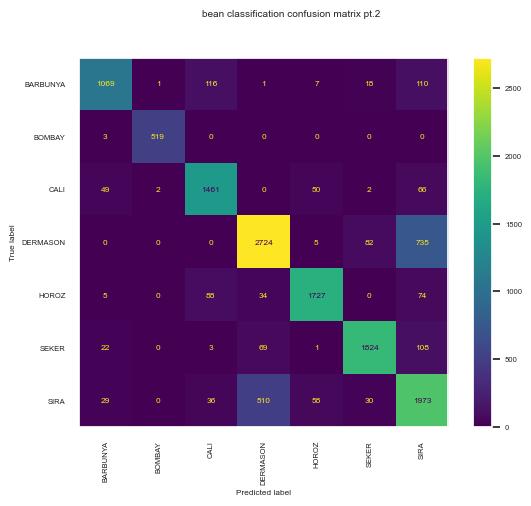

In [20]:
conf_mat = confusion_matrix(y_true = y_true, y_pred = y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))

plt.gcf().set_size_inches(7, 7)
conf_mat_disp.plot()
plt.xticks(rotation = 90)
plt.suptitle("bean classification confusion matrix pt.2")
sns.set(font_scale = .5)
plt.grid(False)